<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Stats-analytics/blob/main/ExamGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement and Objectives**

We aim to develop a predictive model for heart disease using patient data to improve early detection, identify key risk factors, optimize resource allocation, and ultimately improve patient outcomes.

# **Dataset Exploration and Preprocessing**


Data Loading

In [63]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

for filename in uploaded.keys():
  name = filename
  df = pd.read_csv(io.BytesIO(uploaded[name]))
df

Saving heart.csv to heart (9).csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,NaN,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,NaN,1,1.2,1,1,3,0


a. Explore the Dataset:

In [64]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Imputation of numerical Values with the mean

In [81]:

import pandas as pd
from google.colab import files
import io

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with the mean
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values in categorical columns with the mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check for remaining missing values
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
age           0
sex           0
cp            0
trestbps      0
chol          0
             ..
thalach_90    0
thalach_95    0
thalach_96    0
thalach_97    0
thalach_99    0
Length: 102, dtype: int64


<ipython-input-81-5d6c9c9aa830>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [68]:

import pandas as pd
from google.colab import files
import io
import numpy as np

#  data types
print("\nData types of each column:\n", df.dtypes)




Data types of each column:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach      object
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


Outlier detection


Outliers:

No outliers in age

No outliers in sex

No outliers in cp

Outliers in trestbps:
     age  sex  cp  trestbps  chol  fbs  restecg thalach  exang  oldpeak  \
8     52    1   2       172   199    1        1     162      0      0.5   
101   59    1   3       178   270    0        0     145      0      4.2   
110   64    0   0       180   325    0        1     154      1      0.0   
203   68    1   2       180   274    1        0     150      1      1.6   
223   56    0   0       200   288    1        0     133      1      4.0   
241   59    0   0       174   249    0        1     143      1      0.0   
248   54    1   1       192   283    0        0     195      0      0.0   
260   66    0   0       178   228    1        1     165      1      1.0   
266   55    0   0       180   327    0        2     117      1      3.4   

     slope  ca  thal  target  
8        2   0     3       1  
101      0   0     3       1  
110      2   0     2       1  
203      1   0     3       0  
2

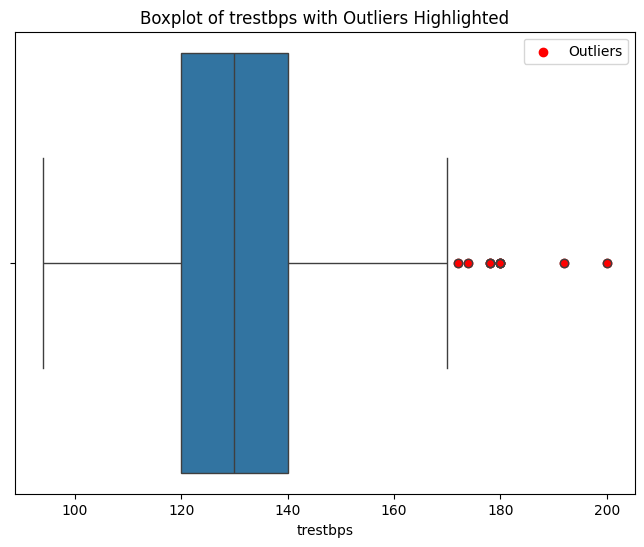


Outliers in chol:
     age  sex  cp  trestbps  chol  fbs  restecg thalach  exang  oldpeak  \
28    65    0   2       140   417    1        0     157      0      0.8   
85    67    0   2       115   564    0        0     160      0      1.6   
96    62    0   0       140   394    0        0     157      0      1.2   
220   63    0   0       150   407    0        0     154      0      4.0   
246   56    0   0       134   409    0        0     150      1      1.9   

     slope  ca  thal  target  
28       2   1     2       1  
85       1   0     3       1  
96       1   0     2       1  
220      1   3     3       0  
246      1   2     3       0  


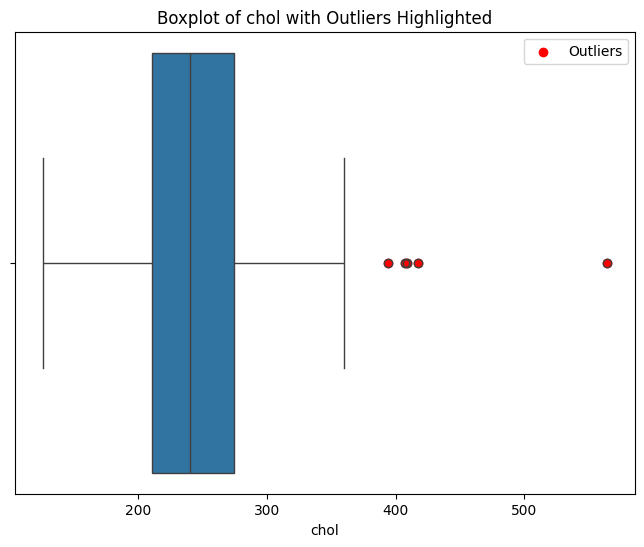


Outliers in fbs:
     age  sex  cp  trestbps  chol  fbs  restecg thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0     150      0      2.3   
8     52    1   2       172   199    1        1     162      0      0.5   
14    58    0   3       150   283    1        0     162      0      1.0   
23    61    1   2       150   243    1        1     137      1      1.0   
26    59    1   2       150   212    1        1     157      0      1.6   
28    65    0   2       140   417    1        0     157      0      0.8   
29    53    1   2       130   197    1        0     152      0      1.2   
36    54    0   2       135   304    1        1     170      0      0.0   
60    71    0   2       110   265    1        0     130      0      0.0   
64    58    1   2       140   211    1        0     165      0      0.0   
76    51    1   2       125   245    1        0     166      0      2.4   
78    52    1   1       128   205    1        1     184      0      0.0   
83    5

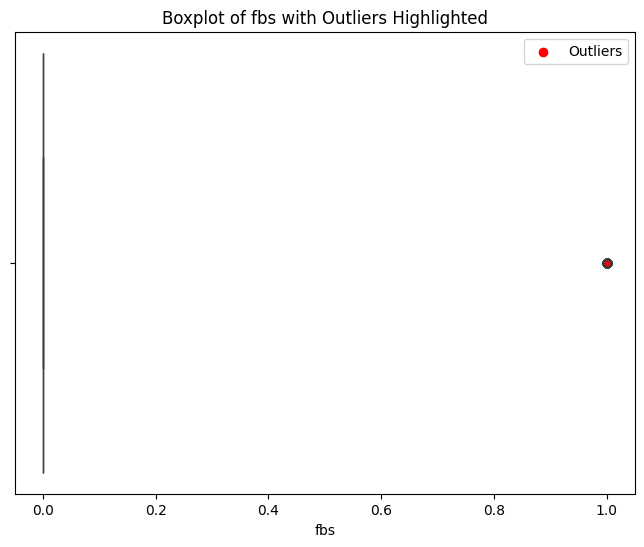


No outliers in restecg

No outliers in exang

Outliers in oldpeak:
     age  sex  cp  trestbps  chol  fbs  restecg thalach  exang  oldpeak  \
101   59    1   3       178   270    0        0     145      0      4.2   
204   62    0   0       160   164    0        0     145      0      6.2   
221   55    1   0       140   217    0        1     111      1      5.6   
250   51    1   0       140   298    0        1     122      1      4.2   
291   58    1   0       114   318    0        2     140      0      4.4   

     slope  ca  thal  target  
101      0   0     3       1  
204      0   3     3       0  
221      0   0     3       0  
250      1   3     3       0  
291      0   3     1       0  


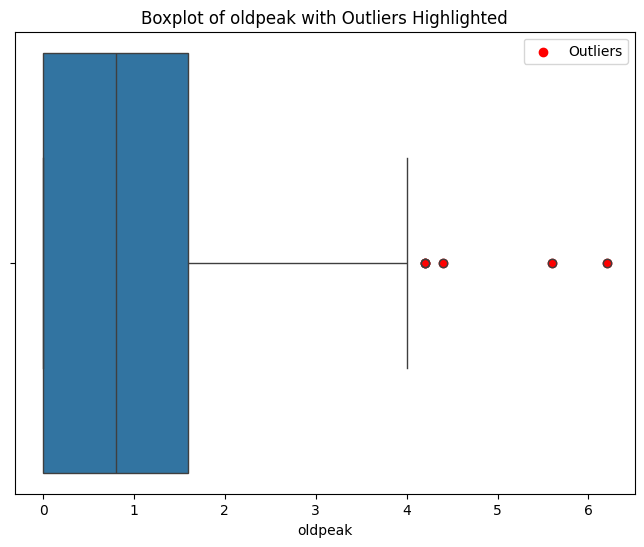


No outliers in slope

Outliers in ca:
     age  sex  cp  trestbps  chol  fbs  restecg thalach  exang  oldpeak  \
52    62    1   2       130   231    0        1     146      0      1.8   
92    52    1   2       138   223    0        1     169      0      0.0   
97    52    1   0       108   233    1        1     147      0      0.1   
99    53    1   2       130   246    1        0     173      0      0.0   
158   58    1   1       125   220    0        1     144      0      0.4   
163   38    1   2       138   175    0        1     173      0      0.0   
164   38    1   2       138   175    0        1     173      0      0.0   
165   67    1   0       160   286    0        0     108      1      1.5   
181   65    0   0       150   225    0        0     114      0      1.0   
191   58    1   0       128   216    0        0     131      1      2.2   
204   62    0   0       160   164    0        0     145      0      6.2   
208   49    1   2       120   188    0        1     139      

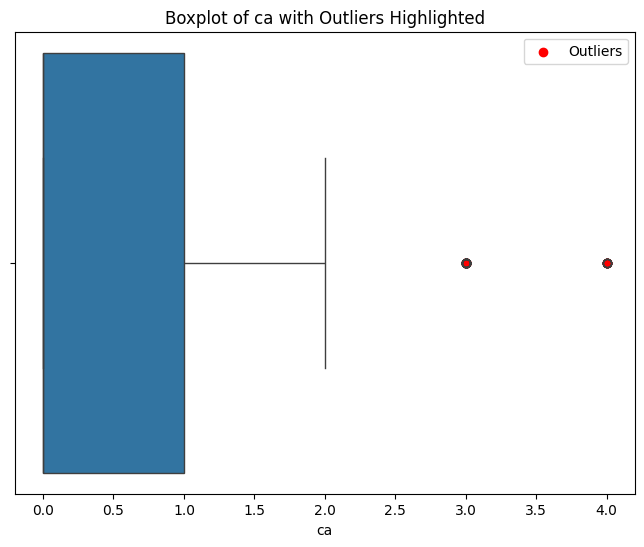


Outliers in thal:
     age  sex  cp  trestbps  chol  fbs  restecg thalach  exang  oldpeak  \
48    53    0   2       128   216    0        0     115      0      0.0   
281   52    1   0       128   204    1        1     156      1      1.0   

     slope  ca  thal  target  
48       2   0     0       1  
281      1   0     0       0  


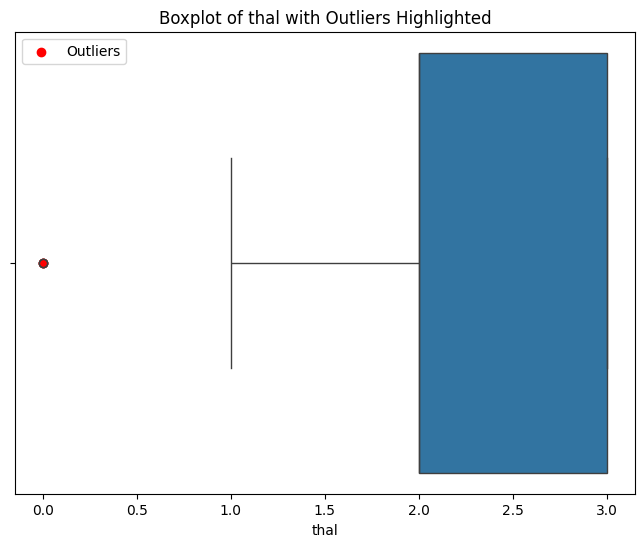


No outliers in target


In [69]:
# prompt: only show the outliers in a graph

import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Detect outliers for numeric columns
print("\nOutliers:")
for column in df.select_dtypes(include=np.number).columns:
    outliers = detect_outliers_iqr(df, column)
    if not outliers.empty:
        print(f"\nOutliers in {column}:\n{outliers}")
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.scatter(outliers[column], [0]*len(outliers), color='red', label='Outliers')
        plt.title(f'Boxplot of {column} with Outliers Highlighted')
        plt.xlabel(column)
        plt.legend()
        plt.show()
    else:
      print(f"\nNo outliers in {column}")

In [70]:
# prompt: show inconsistent values in all features

import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# non-numeric in numeric columns
print("\nInconsistent values:")
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        non_numeric_values = df[~df[column].apply(lambda x: isinstance(x, (int, float)))]
        if not non_numeric_values.empty:
            print(f"\nInconsistent non-numeric values found in numeric column '{column}':\n{non_numeric_values[column]}")
    else:
        # numbers in a string column
        unique_types = df[column].apply(type).unique()
        if len(unique_types) > 1:
           print(f"\nInconsistent data types found in column '{column}': {unique_types}")

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print(f"\nDuplicate rows found:\n{duplicate_rows}")
else:
    print("\nNo duplicate rows found.")

# age
print("\nInconsistent values:")
print(df[(df['age'] < 0) | (df['age'] > 120)])



Inconsistent values:

Duplicate rows found:
     age  sex  cp  trestbps  chol  fbs  restecg thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1     173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  

Inconsistent values:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


b. Age Distribution:

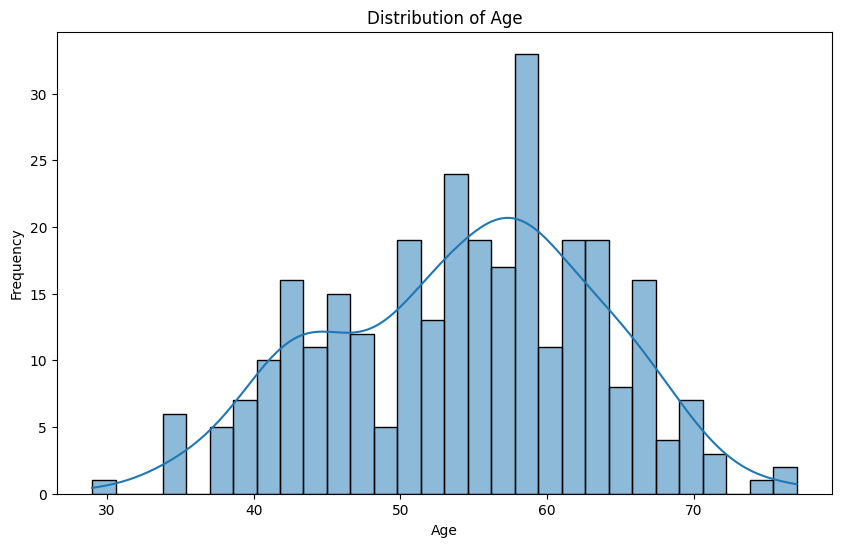

In [60]:

import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# b. Age Distribution:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age distribution in histogram the  appears to be approximately normal with a slight positive skew. It has a bell-shaped curve but is not perfectly symmetrical.

c. Data Preparation:

In [73]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])
print("DataFrame after Min-Max Scaling:")

#One-Hot Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nDataFrame after One-Hot Encoding:")
df.head()

DataFrame after Min-Max Scaling:

DataFrame after One-Hot Encoding:


,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,...,thalach_192,thalach_195,thalach_202,thalach_71,thalach_88,thalach_90,thalach_95,thalach_96,thalach_97,thalach_99
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.0,0.370968,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.0,0.564516,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.0,0.225806,1.0,...,False,False,False,False,False,False,False,False,False,False
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.0,0.129032,1.0,...,False,False,False,False,False,False,False,False,False,False
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,1.0,0.096774,1.0,...,False,False,False,False,False,False,False,False,False,False


d. Feature Selection:



In [72]:


import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
# Feature Selection
X = df.drop('target', axis=1)
y = df['target']

# Using SelectKBest with f_classif
selector = SelectKBest(score_func=f_classif, k=X.shape[1]-2)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask].tolist()
removed_features = [feature for feature in X.columns if feature not in selected_features]

print("Selected Features:", selected_features)
print("Removed Features:", removed_features)

df_new = df[selected_features + ['target']]
print("\nDataFrame after Feature Selection:")
df_new.head()

Selected Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'thalach_103', 'thalach_105', 'thalach_106', 'thalach_108', 'thalach_109', 'thalach_111', 'thalach_112', 'thalach_113', 'thalach_114', 'thalach_115', 'thalach_117', 'thalach_118', 'thalach_120', 'thalach_121', 'thalach_122', 'thalach_123', 'thalach_124', 'thalach_125', 'thalach_126', 'thalach_127', 'thalach_128', 'thalach_129', 'thalach_130', 'thalach_131', 'thalach_132', 'thalach_133', 'thalach_134', 'thalach_136', 'thalach_137', 'thalach_138', 'thalach_139', 'thalach_140', 'thalach_141', 'thalach_142', 'thalach_143', 'thalach_144', 'thalach_145', 'thalach_146', 'thalach_147', 'thalach_148', 'thalach_149', 'thalach_150', 'thalach_151', 'thalach_152', 'thalach_153', 'thalach_154', 'thalach_155', 'thalach_156', 'thalach_157', 'thalach_158', 'thalach_159', 'thalach_160', 'thalach_161', 'thalach_163', 'thalach_164', 'thalach_165', 'thalach_166', 'thalach_167', 'thalach_

,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,...,thalach_195,thalach_202,thalach_71,thalach_88,thalach_90,thalach_95,thalach_96,thalach_97,thalach_99,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.0,0.370968,0.0,...,False,False,False,False,False,False,False,False,False,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.0,0.564516,0.0,...,False,False,False,False,False,False,False,False,False,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.0,0.225806,1.0,...,False,False,False,False,False,False,False,False,False,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.0,0.129032,1.0,...,False,False,False,False,False,False,False,False,False,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,1.0,0.096774,1.0,...,False,False,False,False,False,False,False,False,False,1.0


f_classif is a feature selection method that uses the ANOVA F-test to rank features based on importance.
it removed the least two important features.(thalach_116', 'thalach_162)

# ***3. Classification Model(Logistic Regression )***

In [83]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model Training and Evaluation
X = df_new.drop('target', axis=1)
y = df_new['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracyLR = accuracy_score(y_test, y_pred)
precisionLR = precision_score(y_test, y_pred)
recallLR = recall_score(y_test, y_pred)
f1LR = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracyLR}")
print(f"Precision: {precisionLR}")
print(f"Recall: {recallLR}")
print(f"F1 Score: {f1LR}")

Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 Score: 0.8282828282828283


Recall is crucial for heart disease prediction. It prioritizes identifying individuals with the disease, minimizing the risk of delayed treatment and its potential harm.

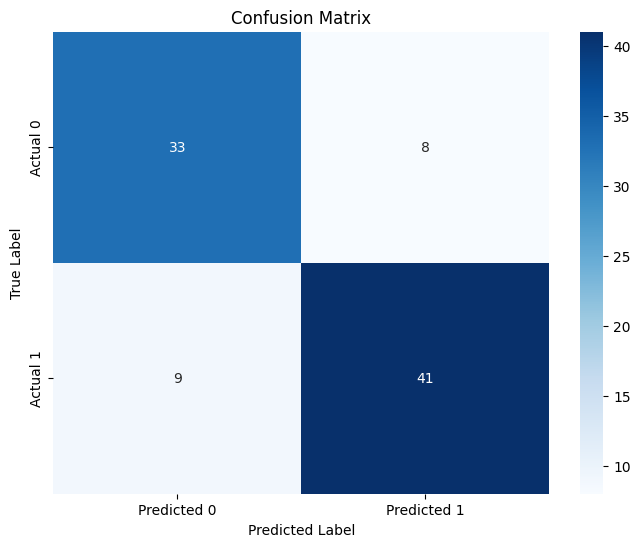

Explanation of the Confusion Matrix:
True Positives (TP): Upper-left cell. Number of cases where the model correctly predicted the presence of heart disease (1) when it was actually present (1).
True Negatives (TN): Bottom-right cell. Number of cases where the model correctly predicted the absence of heart disease (0) when it was actually absent (0).
False Positives (FP): Upper-right cell. Number of cases where the model incorrectly predicted the presence of heart disease (1) when it was actually absent (0). Also known as Type I error.
False Negatives (FN): Bottom-left cell. Number of cases where the model incorrectly predicted the absence of heart disease (0) when it was actually present (1). Also known as Type II error.


In [79]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Explanation of components
print("Explanation of the Confusion Matrix:")
print("True Positives (TP): Upper-left cell. Number of cases where the model correctly predicted the presence of heart disease (1) when it was actually present (1).")
print("True Negatives (TN): Bottom-right cell. Number of cases where the model correctly predicted the absence of heart disease (0) when it was actually absent (0).")
print("False Positives (FP): Upper-right cell. Number of cases where the model incorrectly predicted the presence of heart disease (1) when it was actually absent (0). Also known as Type I error.")
print("False Negatives (FN): Bottom-left cell. Number of cases where the model incorrectly predicted the absence of heart disease (0) when it was actually present (1). Also known as Type II error.")

# ***4. Creative Task: Neural Networks(Feedforward Neural Network (FFNN))***

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.7363
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Accuracy: 0.7363
Precision: 0.7826
Recall: 0.7200
F1 Score: 0.7500


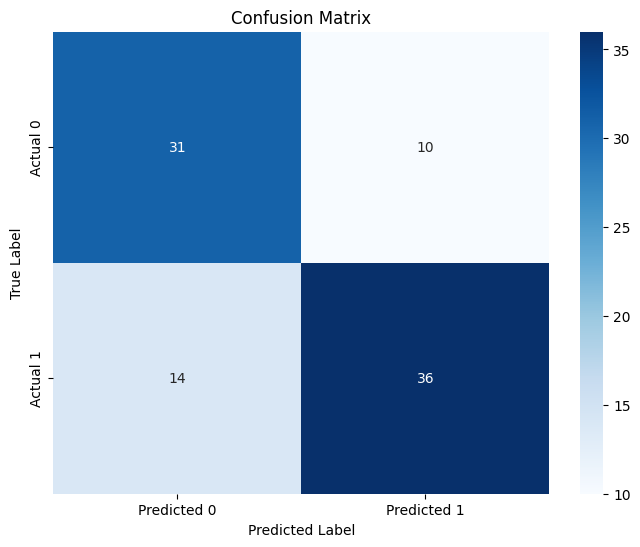

In [84]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

df_new = df[selected_features + ['target']]

# Model Training and Evaluation
X = df_new.drop('target', axis=1)
y = df_new['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
     Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate performance metrics
accuracyFFNN = accuracy_score(y_test, y_pred)
precisionFFNN = precision_score(y_test, y_pred)
recallFFNN = recall_score(y_test, y_pred)
f1FFNN = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracyFFNN:.4f}")
print(f"Precision: {precisionFFNN:.4f}")
print(f"Recall: {recallFFNN:.4f}")
print(f"F1 Score: {f1FFNN:.4f}")


# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

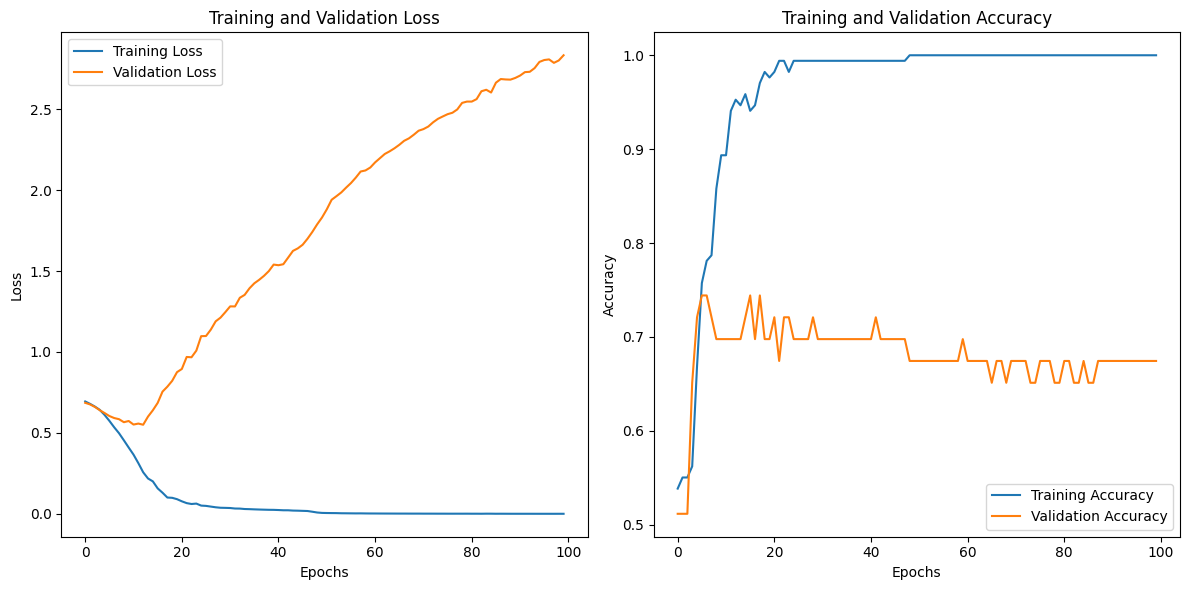

In [89]:

import matplotlib.pyplot as plt

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

The model shows promising initial learning but suffers from overfitting, as evidenced by the divergence between training and validation loss/accuracy after epoch 20. This suggests the model is memorizing the training data rather than generalizing well.

In [88]:
print("\nComparison of Logistic Regression and FFNN Model Performance:")
print("----------------------------------------------------------")
print(f"Logistic Regression:")
print(f"  Accuracy: {accuracyLR:.4f}")
print(f"  Precision: {precisionLR:.4f}")
print(f"  Recall: {recallLR:.4f}")
print(f"  F1 Score: {f1LR:.4f}")
print("----------------------------------------------------------")
print(f"Feedforward Neural Network (FFNN):")
print(f"  Accuracy: {accuracyFFNN:.4f}")
print(f"  Precision: {precisionFFNN:.4f}")
print(f"  Recall: {recallFFNN:.4f}")
print(f"  F1 Score: {f1FFNN:.4f}")
print("----------------------------------------------------------")
# Model Comparison Summary
print("\nModel Comparison Summary:")
print("----------------------------------------------------------")
print("1. Accuracy: Measures the overall correctness of the model's predictions. A higher accuracy indicates that the model is making correct predictions more frequently.")
print("2. Precision: Measures the accuracy of the positive predictions. A high precision score indicates that when the model predicts a positive case, it is likely to be correct.")
print("3. Recall: Measures the model's ability to find all the positive cases. A high recall score indicates that the model is good at finding positive cases and reduces the risk of missing the disease.")
print("4. F1 Score: The harmonic mean of precision and recall and provides a single score to balance the performance of the model between precision and recall.")
print("----------------------------------------------------------")
print("In the context of heart disease detection, recall is very important. Minimizing the number of false negatives to ensure individuals who have heart disease are correctly identified is important to improve treatment.")
print("In this particular case, both the neural network and Logistic Regression produced relatively similar metrics, with the Logistic Regression being slightly better.")



Comparison of Logistic Regression and FFNN Model Performance:
----------------------------------------------------------
Logistic Regression:
  Accuracy: 0.8132
  Precision: 0.8367
  Recall: 0.8200
  F1 Score: 0.8283
----------------------------------------------------------
Feedforward Neural Network (FFNN):
  Accuracy: 0.7363
  Precision: 0.7826
  Recall: 0.7200
  F1 Score: 0.7500
----------------------------------------------------------

Model Comparison Summary:
----------------------------------------------------------
1. Accuracy: Measures the overall correctness of the model's predictions. A higher accuracy indicates that the model is making correct predictions more frequently.
2. Precision: Measures the accuracy of the positive predictions. A high precision score indicates that when the model predicts a positive case, it is likely to be correct.
3. Recall: Measures the model's ability to find all the positive cases. A high recall score indicates that the model is good at find